In [41]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=100
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.preprocessing import StandardScaler as SSc
from sklearn.preprocessing import MinMaxScaler as MMS
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [28]:
data = pd.read_csv("Data-Prepped.csv",index_col=0)
data = data.astype(np.float32)
data.head()

Bronze  Silver  Gold  Platinum  Diamond  Master  GrandMaster  LeagueIndex  \
0     0.0     0.0   0.0       0.0      1.0     0.0          0.0          5.0   
1     0.0     0.0   0.0       0.0      1.0     0.0          0.0          5.0   
2     0.0     0.0   0.0       1.0      0.0     0.0          0.0          4.0   
3     0.0     0.0   1.0       0.0      0.0     0.0          0.0          3.0   
4     0.0     0.0   1.0       0.0      0.0     0.0          0.0          3.0   

    Age  HoursPerWeek  TotalHours         APM  SelectByHotkeys  \
0  27.0          10.0      3000.0  143.718002         0.003515   
1  23.0          10.0      5000.0  129.232193         0.003304   
2  30.0          10.0       200.0   69.961197         0.001101   
3  19.0          20.0       400.0  107.601601         0.001034   
4  32.0          10.0       500.0  122.890800         0.001136   

   AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0         0.000220            7.0        0.000110            0.000392   
1         0.000259            4.0        0.000294            0.000432   
2         0.000336            4.0        0.000294            0.000461   
3         0.000213            1.0        0.000053            0.000543   
4         0.000327            2.0        0.000000            0.001329   

   NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0      0.004849       32.667702      40.867298        4.7508   
1      0.004307       32.919399      42.345402        4.8434   
2      0.002926       44.647499      75.354797        4.0430   
3      0.003783       29.220301      53.735199        4.9155   
4      0.002368       22.688499      62.081299        9.3740   

   TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0              28.0     0.001397              6.0               0.0   
1              22.0     0.001194              5.0               0.0   
2              22.0     0.000745              6.0               0.0   
3              19.0     0.000426              7.0               0.0   
4              15.0     0.001174              4.0               0.0   

   ComplexAbilitiesUsed  
0              0.000000  
1              0.000208  
2              0.000189  
3              0.000384  
4              0.000019

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3338 entries, 0 to 3337
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bronze                3338 non-null   float32
 1   Silver                3338 non-null   float32
 2   Gold                  3338 non-null   float32
 3   Platinum              3338 non-null   float32
 4   Diamond               3338 non-null   float32
 5   Master                3338 non-null   float32
 6   GrandMaster           3338 non-null   float32
 7   LeagueIndex           3338 non-null   float32
 8   Age                   3338 non-null   float32
 9   HoursPerWeek          3338 non-null   float32
 10  TotalHours            3338 non-null   float32
 11  APM                   3338 non-null   float32
 12  SelectByHotkeys       3338 non-null   float32
 13  AssignToHotkeys       3338 non-null   float32
 14  UniqueHotkeys         3338 non-null   float32
 15  MinimapAttacks       

In [4]:
inddatatxt = open("Data Explanation -- StarCraft II Ranked Players.txt")
print(inddatatxt.read())
var = []
for i in data:
    var.append(i)

Data project data categories

Data pulled from https://www.kaggle.com/danofer/skillcraft which pulled the data from the University of California Irvine's machine learning repository located at http://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset 

This data is taken from replays of 1v1 ranked games of StarCraft II, a real time strategy game in which two or more players compete by accruing resources, building an army and wiping out the enemy. 
A player loses when all of their buildings are destroyed or when they surrender.
Players each start with one base hub and a number of workers located symmetrically on a map. The map is littered with locations containing clusters of minerals and usually gas geysers. 
These are the resources which the players will use to build buildings, construct new technologies and produce armies. 



00 GameID				#
01 LeagueIndex			# Numerical list (1-8) based on categorical rank. Can be considered both categorical and numerical
02 Age				# Ag

In [5]:
data.describe()

Bronze       Silver         Gold     Platinum      Diamond  \
count  3338.000000  3338.000000  3338.000000  3338.000000  3338.000000   
mean      0.050030     0.103954     0.165668     0.242960     0.240863   
std       0.218039     0.305247     0.371838     0.428935     0.427671   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Master  GrandMaster  LeagueIndex          Age  HoursPerWeek  \
count  3338.000000  3338.000000  3338.000000  3338.000000   3338.000000   
mean      0.186040     0.010485     4.120731    21.650389     15.909527   
std       0.389197     0.101875     1.448170     4.206357     11.964495   
min       0.000000     0.000000     1.000000    16.000000      0.000000   
25%       0.000000     0.000000     3.000000    19.000000      8.000000   
50%       0.000000     0.000000     4.000000    21.000000     12.000000   
75%       0.000000     0.000000     5.000000    24.000000     20.000000   
max       1.000000     1.000000     7.000000    44.000000    168.000000   

           TotalHours          APM  SelectByHotkeys  AssignToHotkeys  \
count     3338.000000  3338.000000      3338.000000      3338.000000   
mean       960.421814   114.575768         0.004023         0.000364   
std      17318.134766    48.111912         0.004726         0.000210   
min          3.000000    22.059601         0.000000         0.000000   
25%        300.000000    79.231501         0.001245         0.000202   
50%        500.000000   107.070297         0.002445         0.000349   
75%        800.000000   140.156094         0.004945         0.000493   
max    1000000.000000   389.831390         0.043088         0.001648   

       UniqueHotkeys  MinimapAttacks  MinimapRightClicks  NumberOfPACs  \
count    3338.000000     3338.000000         3338.000000   3338.000000   
mean        4.316357        0.000094            0.000380      0.003433   
std         2.333322        0.000159            0.000359      0.000966   
min         0.000000        0.000000            0.000000      0.000679   
25%         3.000000        0.000000            0.000139      0.002743   
50%         4.000000        0.000039            0.000278      0.003376   
75%         6.000000        0.000113            0.000508      0.004003   
max        10.000000        0.003019            0.003688      0.007971   

       GapBetweenPACs  ActionLatency  ActionsInPAC  TotalMapExplored  \
count     3338.000000    3338.000000   3338.000000       3338.000000   
mean        40.713818      64.209587      5.266955         22.116837   
std         17.057190      19.037394      1.500605          7.440876   
min          6.666700      24.632601      2.038900          5.000000   
25%         29.326599      50.886426      4.261525         17.000000   
50%         37.058901      61.296099      5.087050         22.000000   
75%         48.510426      74.032524      6.027350         27.000000   
max        237.142899     176.372101     18.558100         58.000000   

       WorkersMade  UniqueUnitsMade  ComplexUnitsMade  ComplexAbilitiesUsed  
count  3338.000000      3338.000000       3338.000000           3338.000000  
mean      0.001031         6.541042          0.000060              0.000142  
std       0.000520         1.859048          0.000112              0.000266  
min       0.000077         2.000000          0.000000              0.000000  
25%       0.000682         5.000000          0.000000              0.000000  
50%       0.000904         6.000000          0.000000              0.000020  
75%       0.001258         8.000000          0.000087              0.000182  
max       0.005149        13.000000          0.000902              0.003084

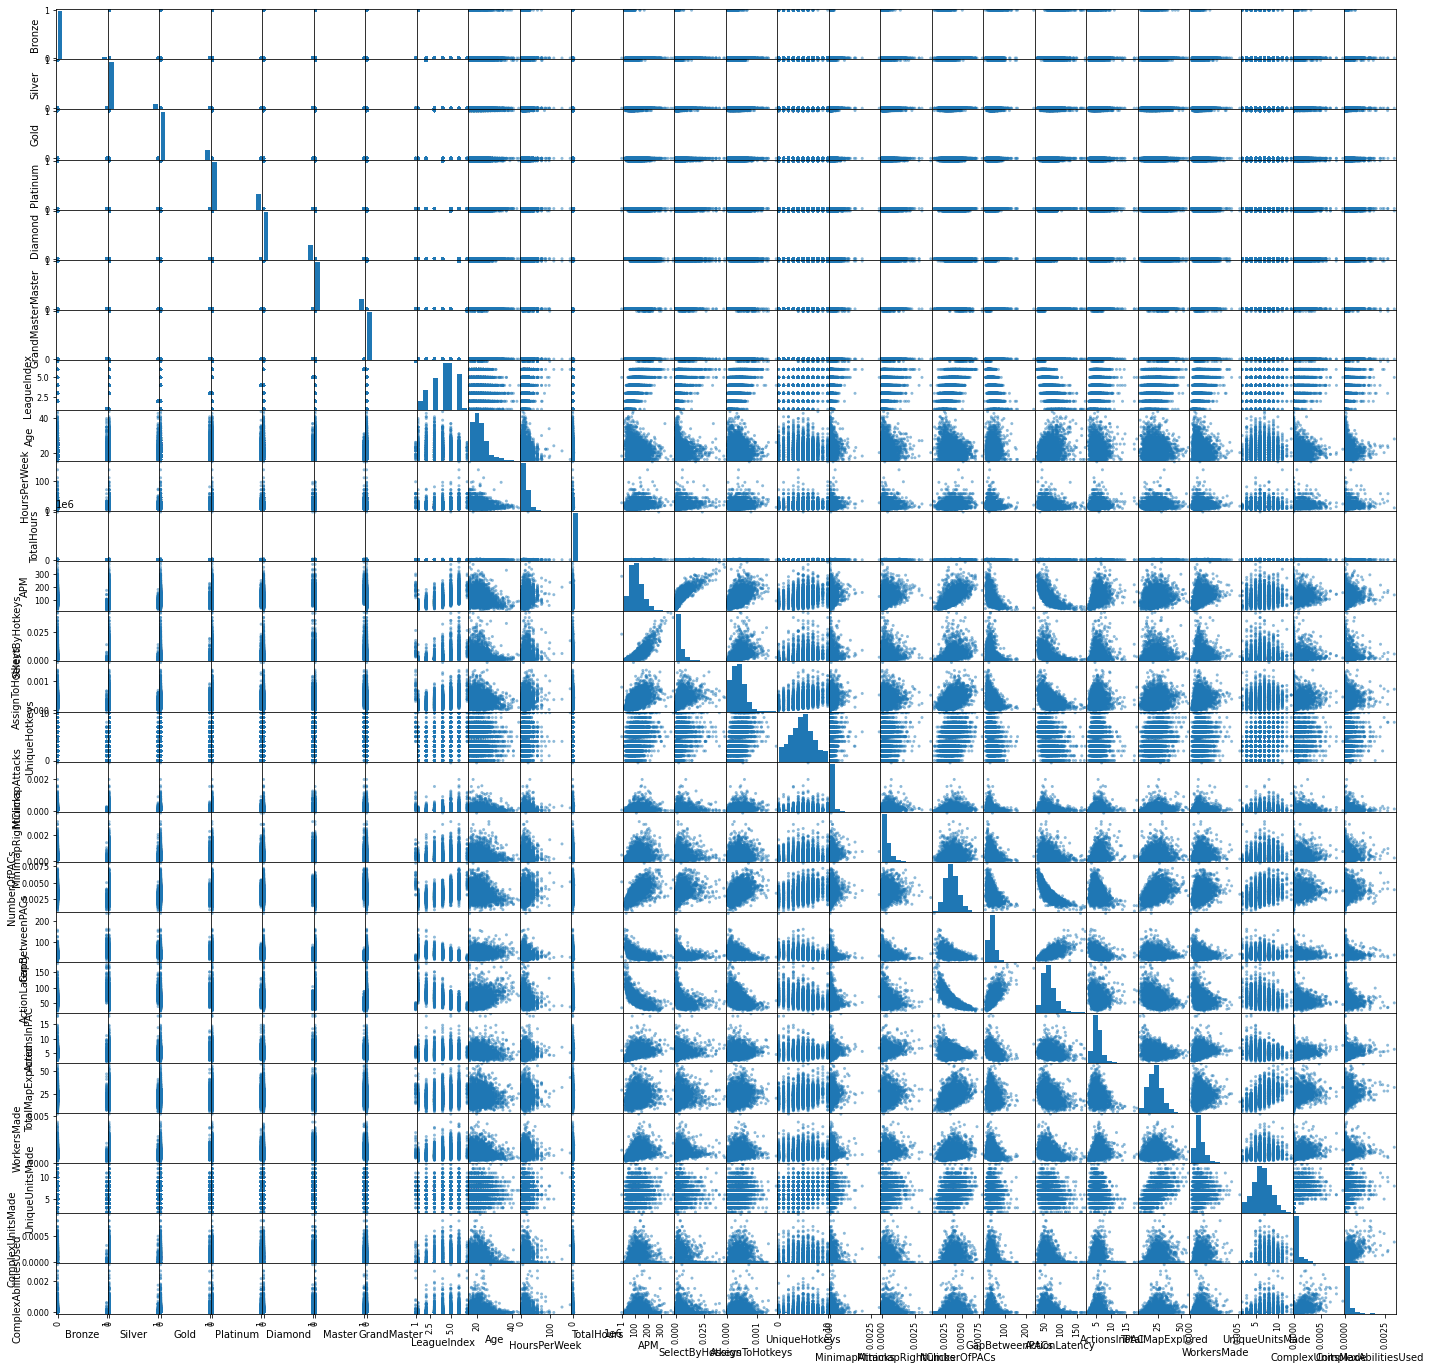

In [6]:
pd.plotting.scatter_matrix(data,figsize=(24,24))
plt.show()

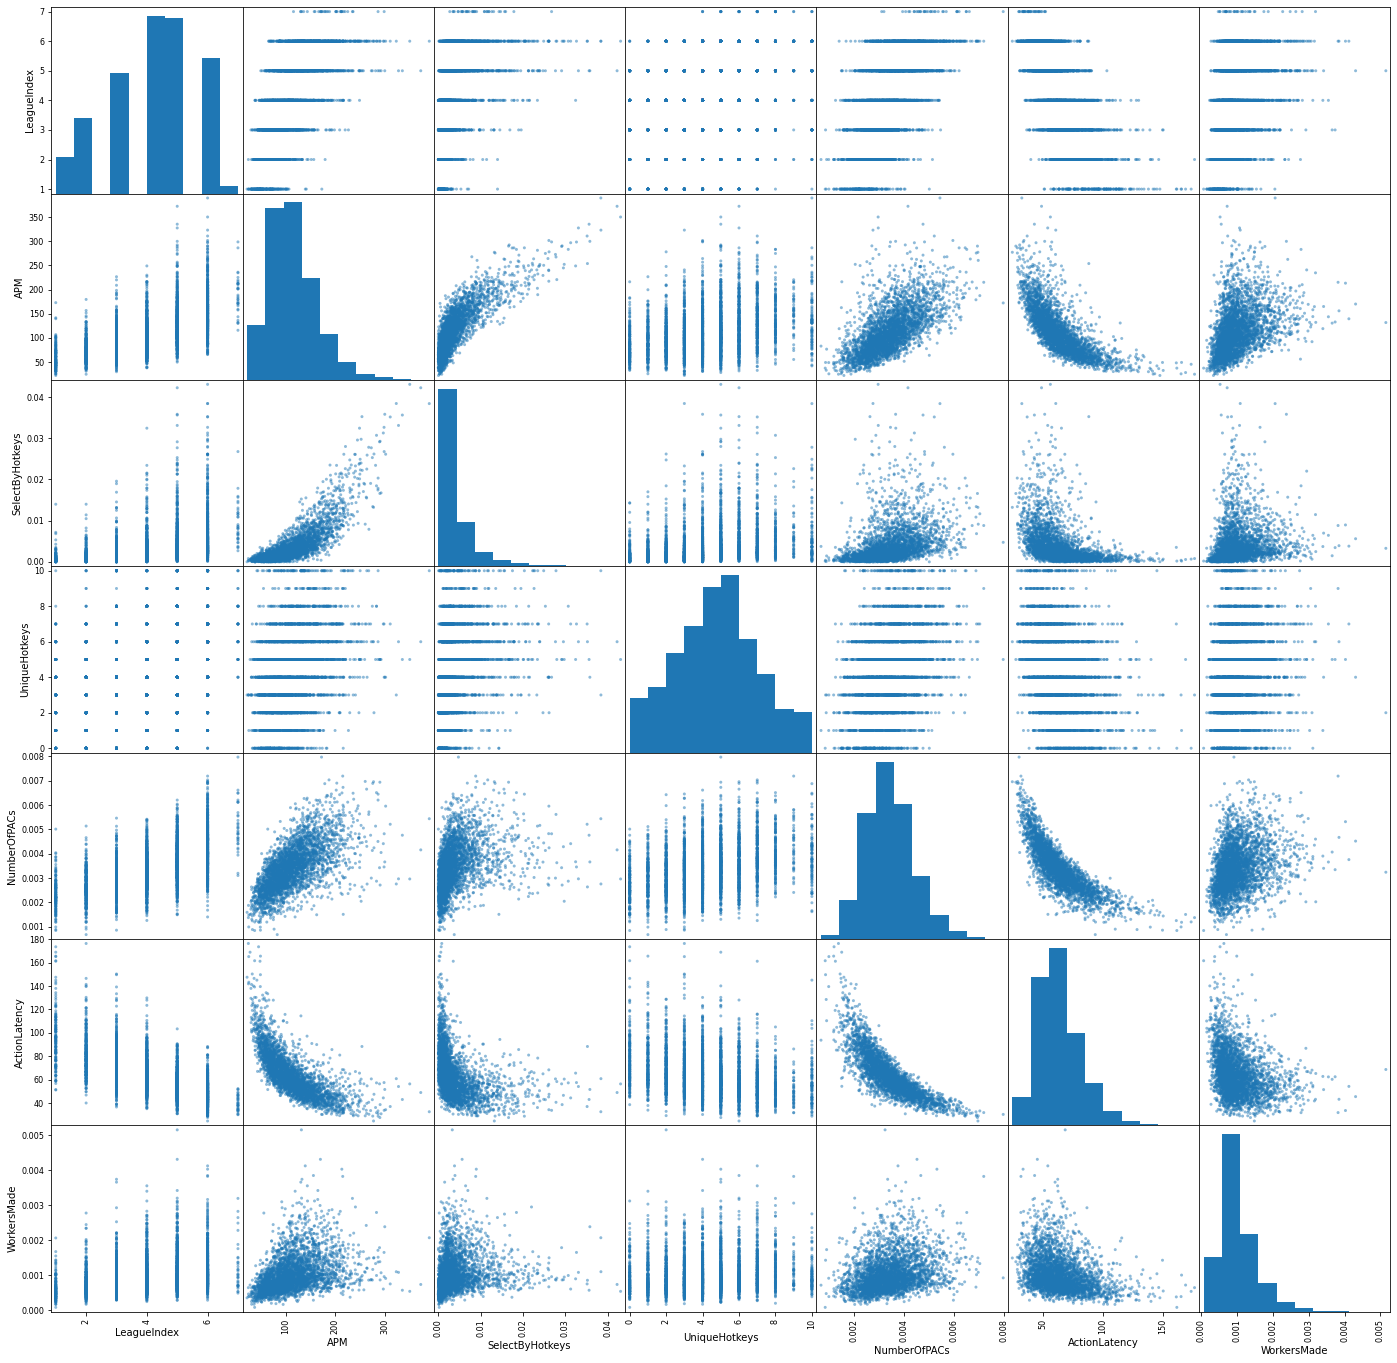

In [7]:
IDs = ['LeagueIndex','APM','SelectByHotkeys','UniqueHotkeys','NumberOfPACs','ActionLatency','WorkersMade']
pd.plotting.scatter_matrix(data[IDs],figsize=(24,24))
plt.show()

### Examine variables from sklearn.decomposition.PCA

In [8]:
pca = PCA()
pca.fit(data[IDs])
data_transformed = pd.DataFrame(pca.transform(data[IDs]))
data_transformed.shape

(3338, 7)

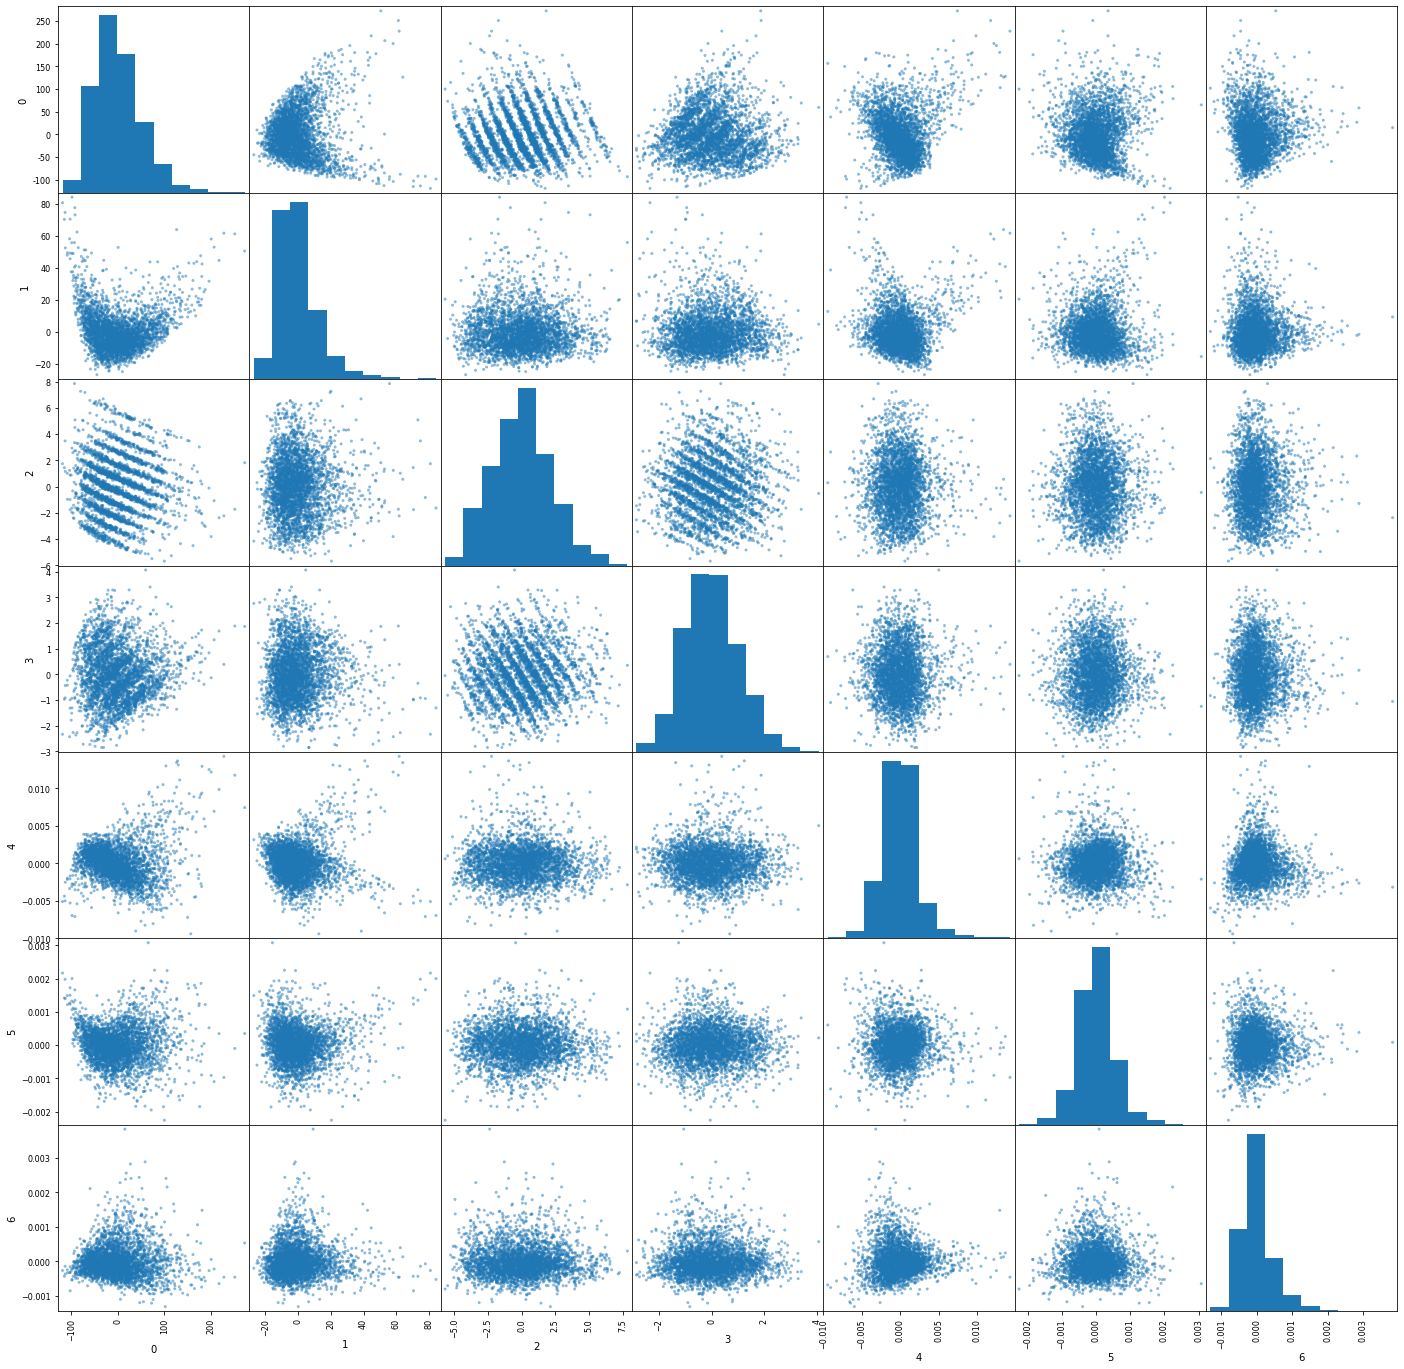

In [9]:
pd.plotting.scatter_matrix(data_transformed,figsize=(24,24))
plt.show()

In [10]:
# Code for the following graphs based on https://www.kaggle.com/immodal/predicting-player-placement
leagueTitles = [       "Bronze","Silver","Gold",   "Platinum","Diamond","Master","Grandmaster"]
leagueIndexs = [            1.0,     2.0,   3.0,          4.0,      5.0,     6.0,          7.0]
colors       = ['darkgoldenrod','silver','gold','springgreen',   'aqua',  'blue',     'indigo']
leagueDict   = dict()
for i, ind in enumerate(leagueIndexs):
    leagueDict[ind] = leagueTitles[i]
leagueLabeled = data["LeagueIndex"].replace(leagueDict)

def violin_plot(y, title, w, h):
    plt.figure(figsize=(w,h))
    ax = sns.violinplot(x=leagueLabeled,y=y,palette=colors,order=leagueTitles)
    ax.set(xlabel='League')
    ax.set_ylim(0,)
    plt.title(title)
    plt.show()
    
def density_plot(x, title, w, h):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15,.85)})
    fig.set_size_inches(w,h)
    ax_box.set_xlim(0,x.max())
    ax_hist.set_xlim(0,x.max())
    sns.boxplot(x,ax=ax_box)
    sns.distplot(x,ax=ax_hist)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box,left=True)
    ax_box.set_title(title)
    plt.show()
    
def plot(feature, fig_num):
    density_plot(data[feature],f"Figure {fig_num}: {feature} Distribution", 11,8)
    violin_plot(data[feature],f"Figure {fig_num}: {feature} by League", 11,8)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


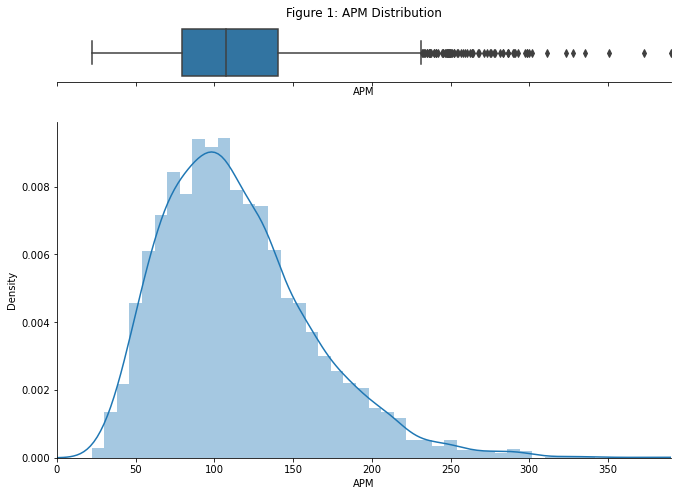

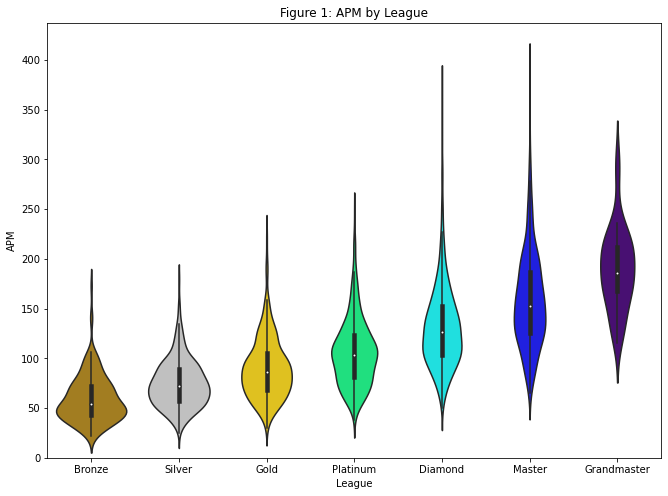

In [11]:
plot("APM",1)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


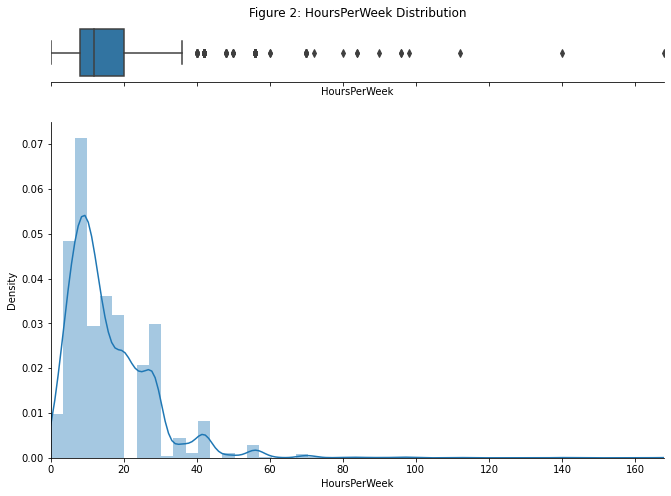

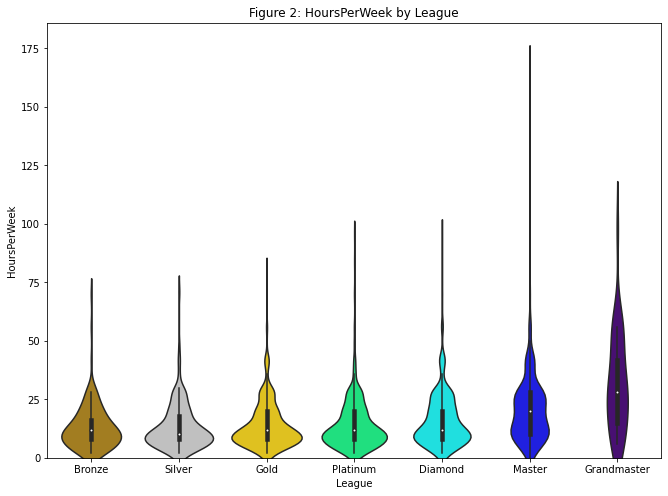

In [12]:
plot("HoursPerWeek",2)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


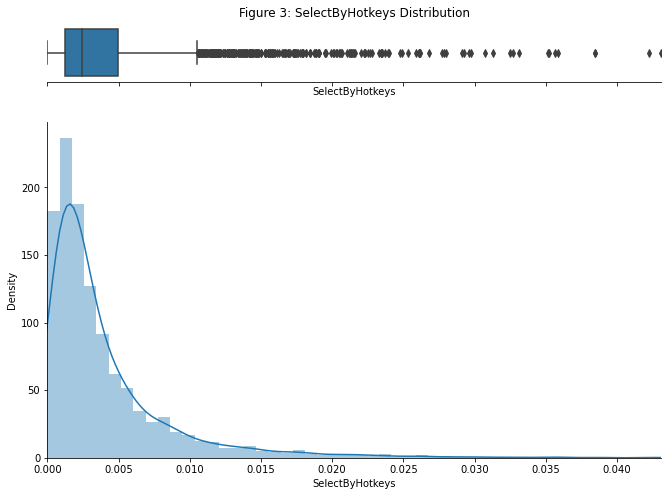

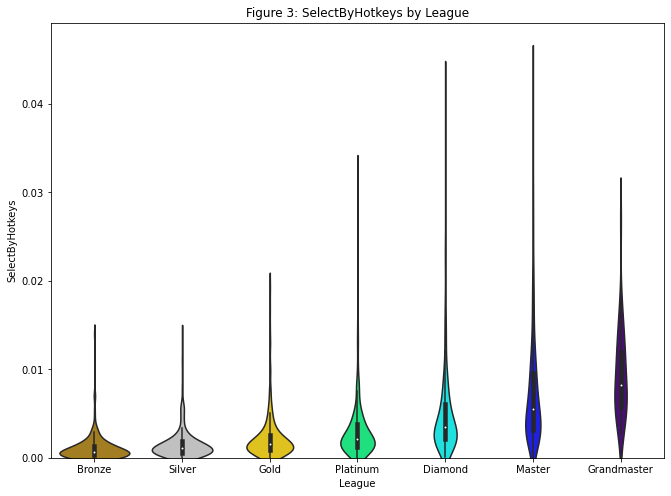

In [13]:
plot("SelectByHotkeys",3)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


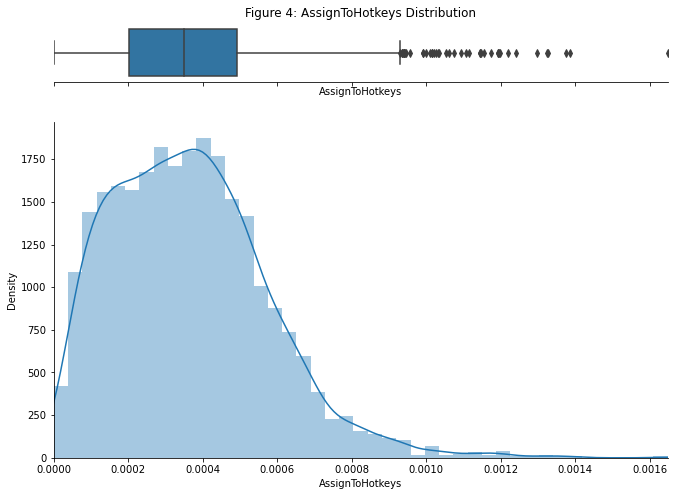

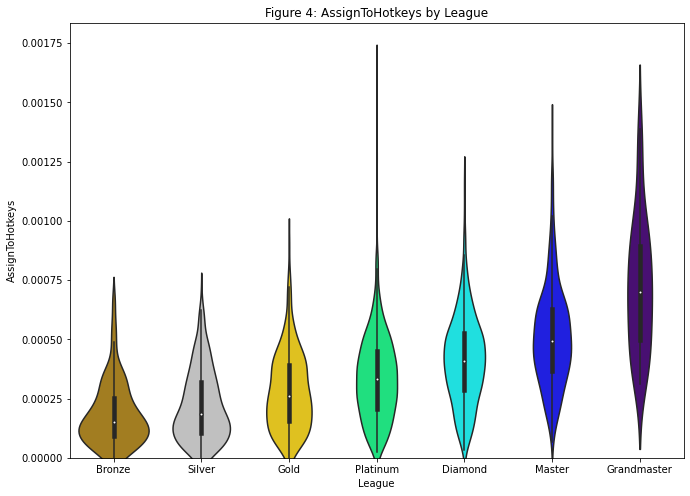

In [14]:
plot("AssignToHotkeys",4)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


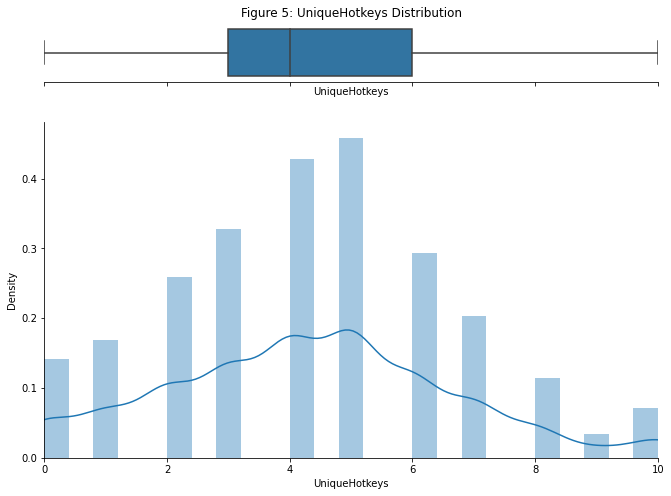

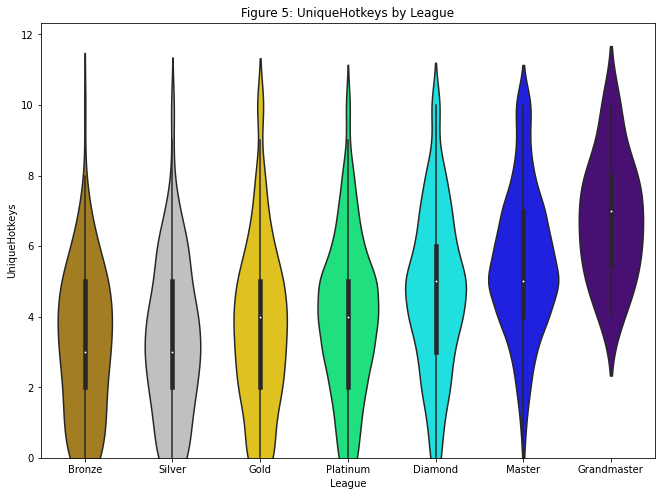

In [15]:
plot("UniqueHotkeys",5)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


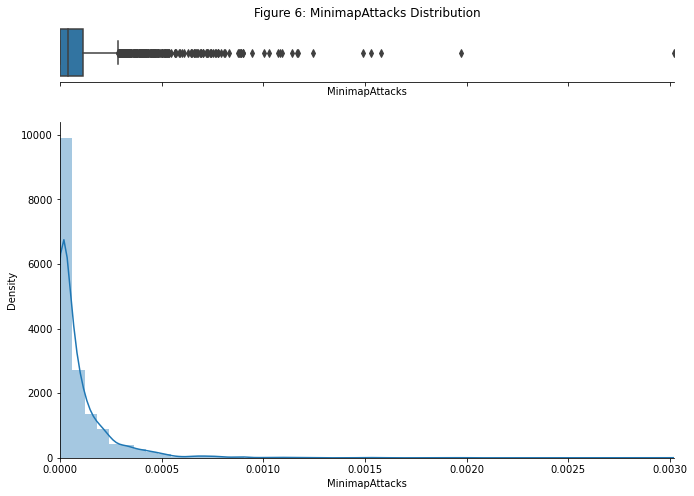

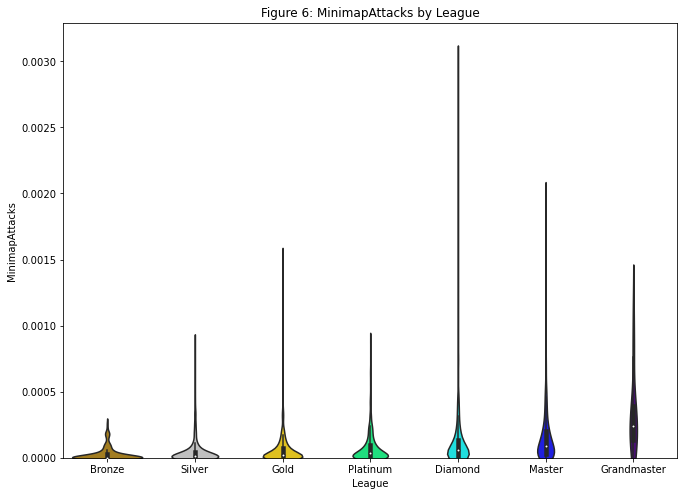

In [16]:
plot("MinimapAttacks",6)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


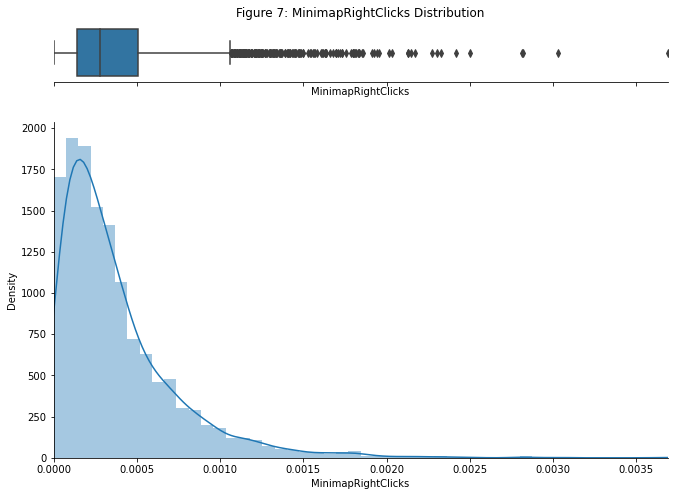

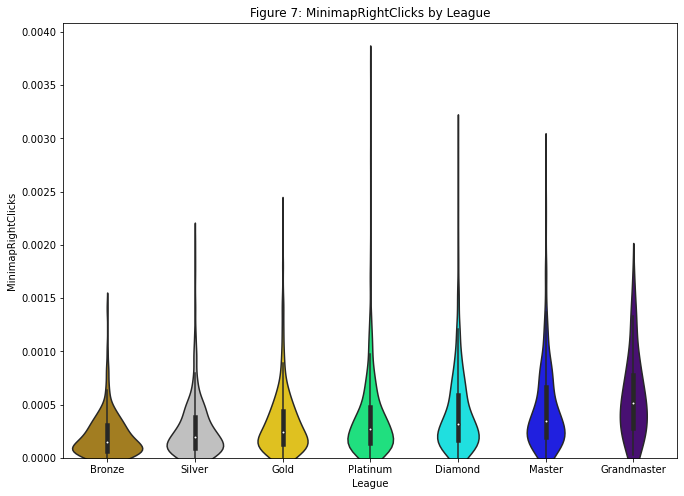

In [17]:
plot("MinimapRightClicks",7)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


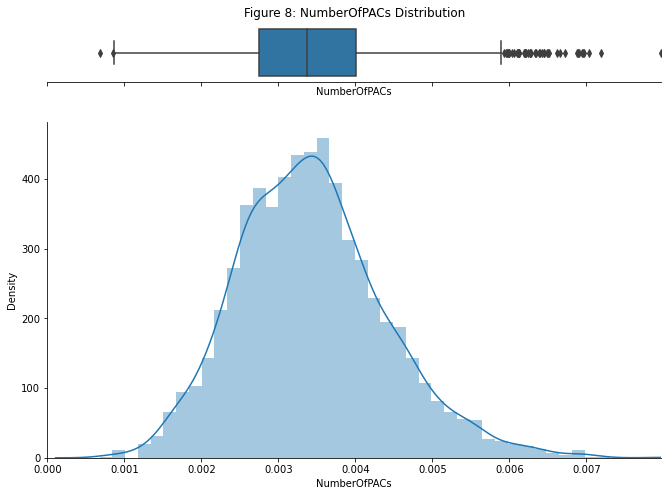

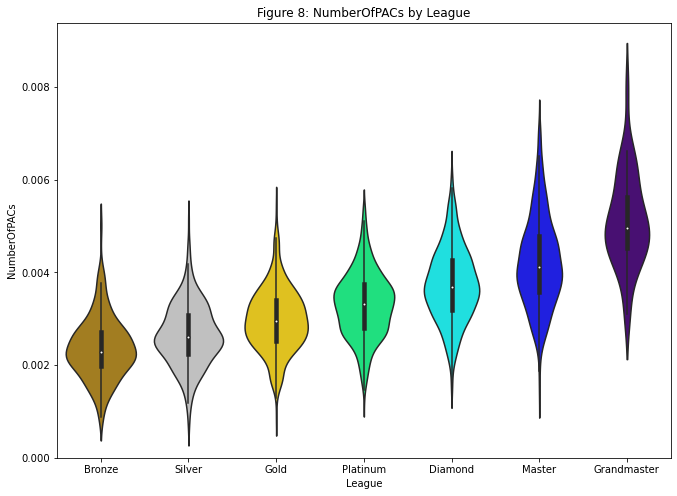

In [18]:
plot("NumberOfPACs",8)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


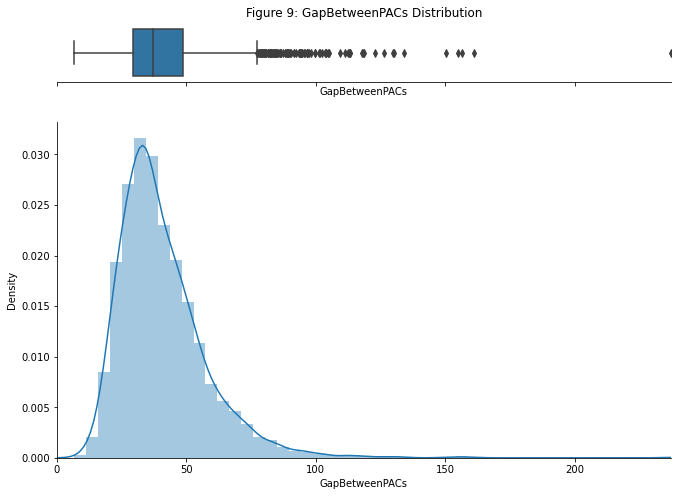

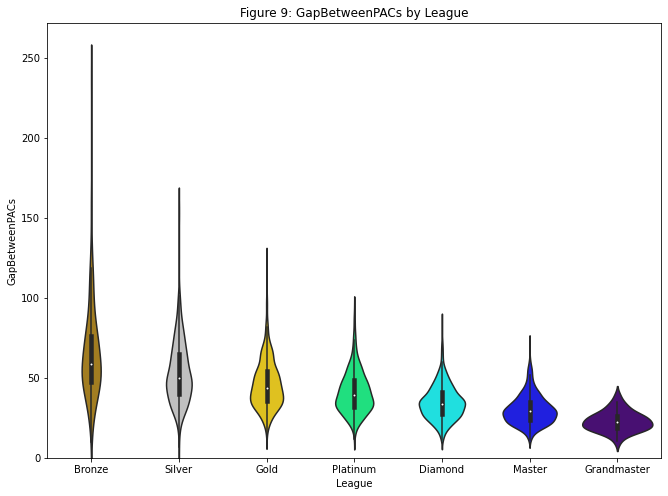

In [19]:
plot("GapBetweenPACs",9)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


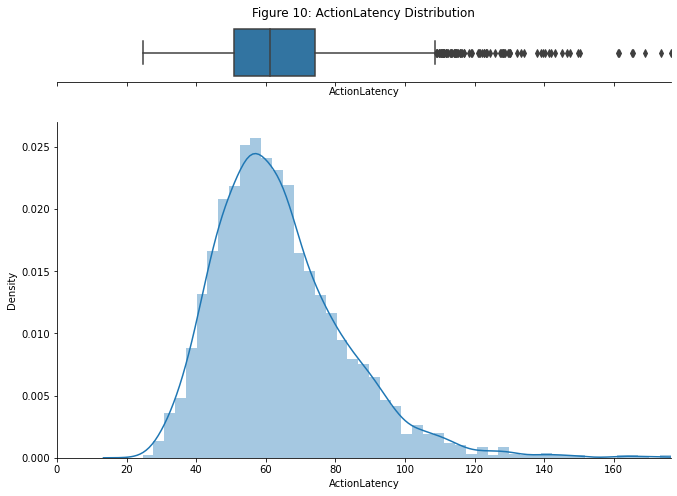

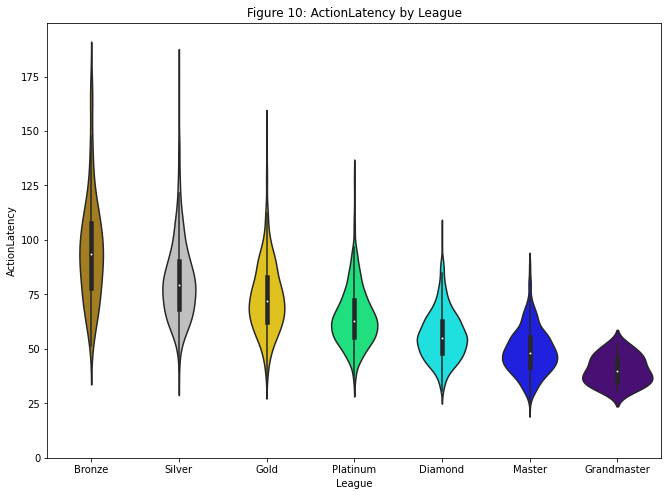

In [20]:
plot("ActionLatency",10)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


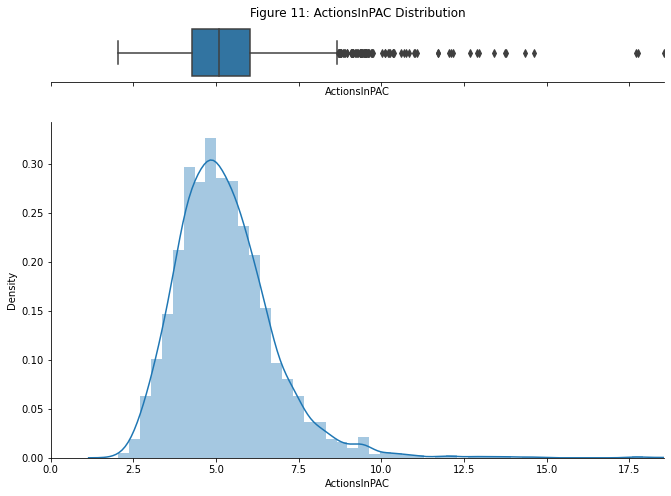

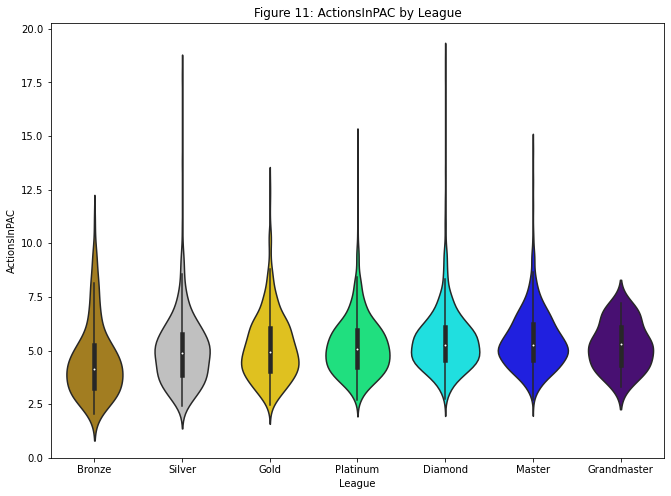

In [21]:
plot("ActionsInPAC",11)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


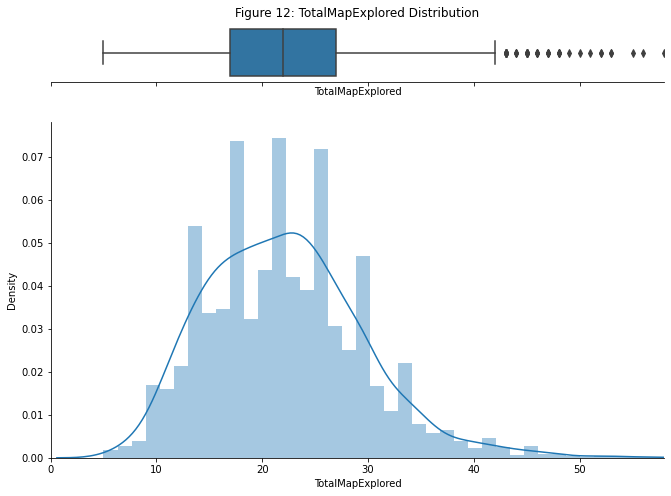

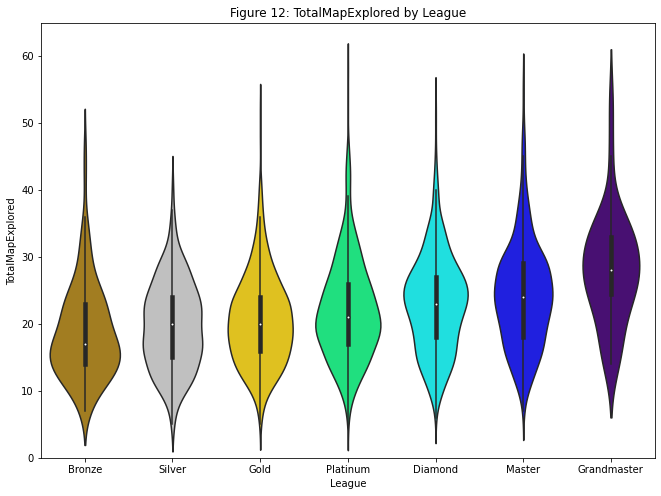

In [22]:
plot("TotalMapExplored",12)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


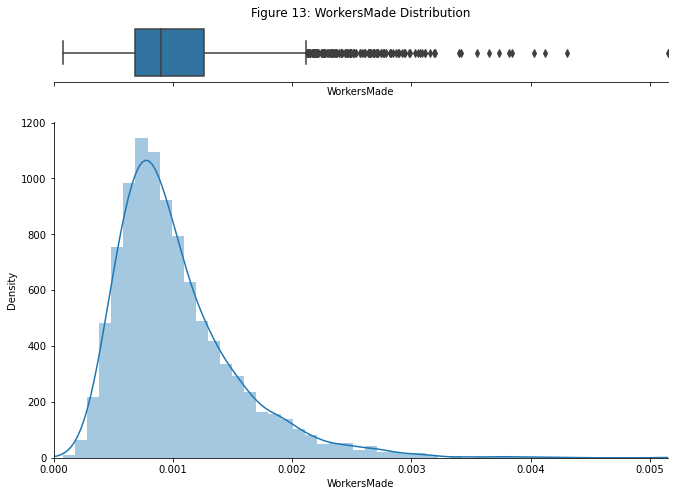

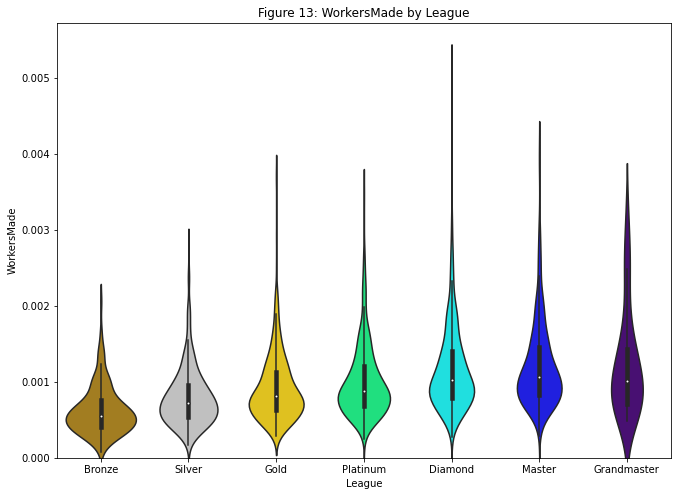

In [23]:
plot("WorkersMade",13)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


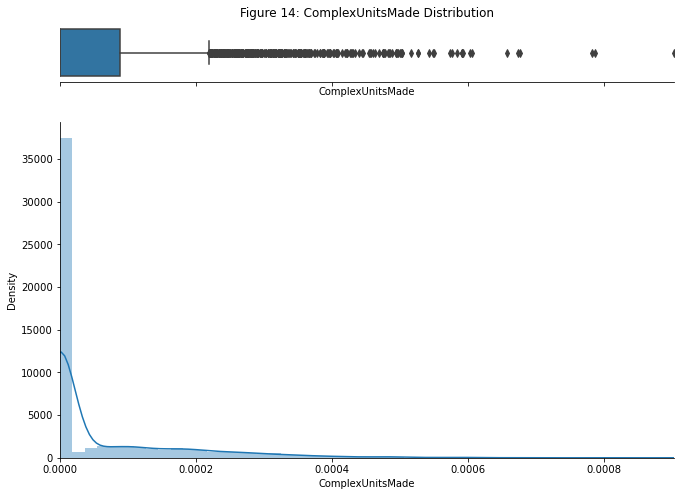

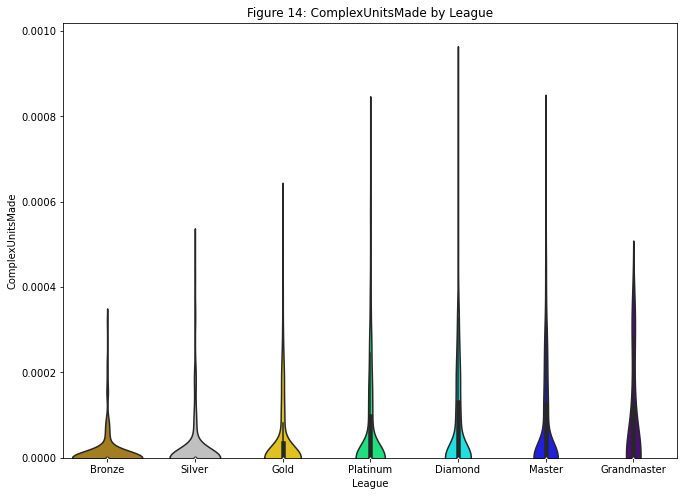

In [24]:
plot("ComplexUnitsMade",14)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


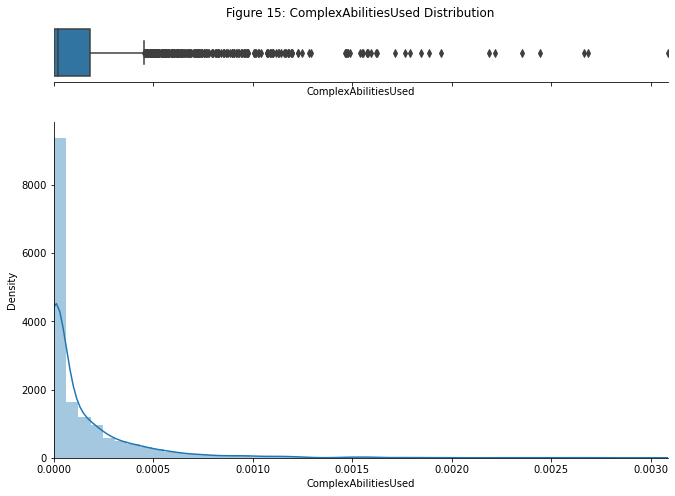

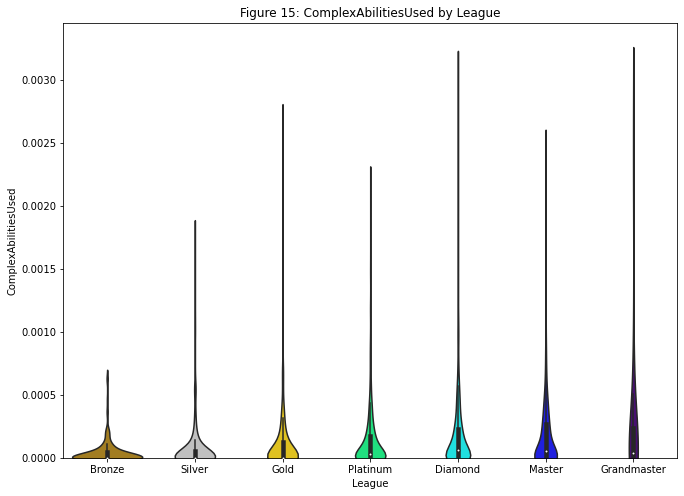

In [25]:
plot("ComplexAbilitiesUsed",15)